In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
from sklearn.linear_model import LinearRegression
import matplotlib

scores:0.9745947506436861
RMSE:0.04714163057567412
scores:0.9839802507433713
RMSE:0.037434387043643866
scores:0.9825512769157699
RMSE:0.03906831623366092


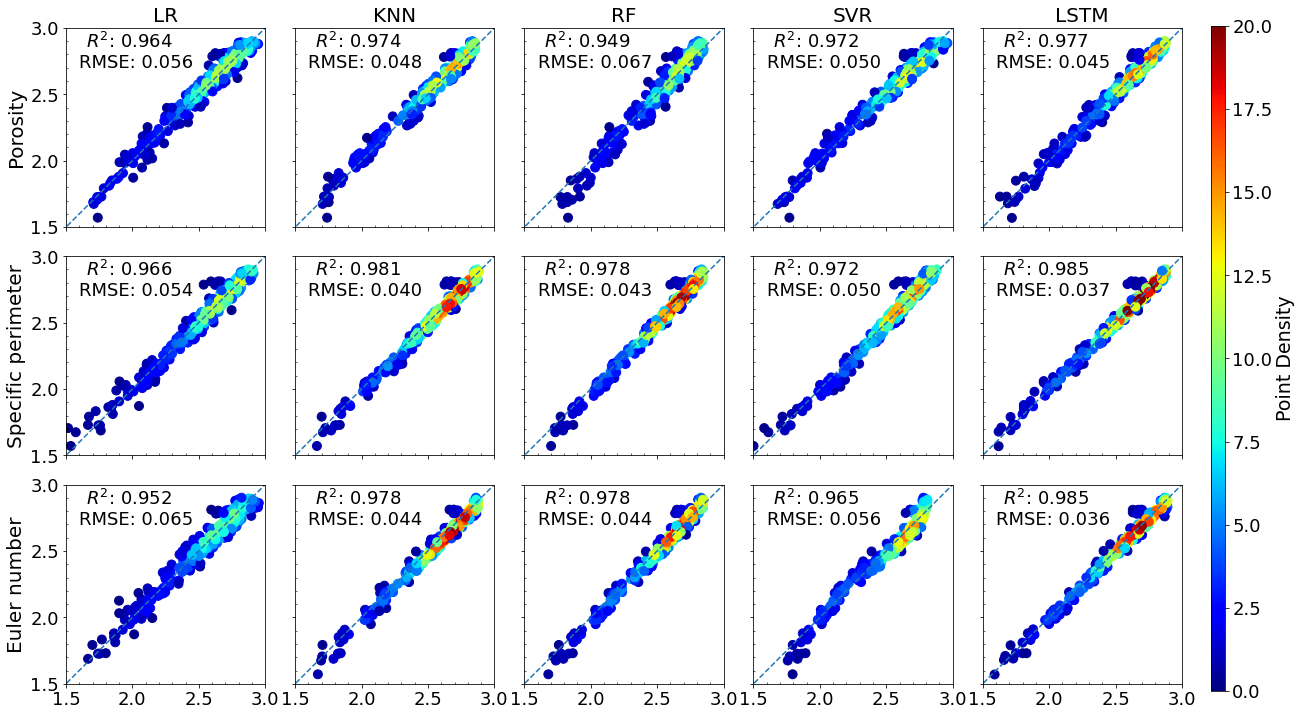

In [3]:
fig = plt.figure(figsize=(20,14))
fig.subplots_adjust(wspace=0.15,hspace=-0.25)
norm = matplotlib.colors.Normalize(vmin=0, vmax=20)

ax1 = fig.add_subplot(3,5,1,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./lr_pred_y_porosity.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_porosity.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
plt.ylabel('Porosity',fontsize=20)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.title("LR",fontsize=20)
plt.text(1.65, 2.85, '${R^2}$: 0.964',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.056",fontsize=18)

ax2 = fig.add_subplot(3,5,2,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./knn_pred_y_porosity.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_porosity.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.title("KNN",fontsize=20)
plt.text(1.65, 2.85, '${R^2}$: 0.974',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.048",fontsize=18)

ax3 = fig.add_subplot(3,5,3,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./rf_pred_y_porosity.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_porosity.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])
plt.title("RF",fontsize=20)
plt.text(1.65, 2.85, '${R^2}$: 0.949',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.067",fontsize=18)

ax4 = fig.add_subplot(3,5,4,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./svr_pred_y_porosity.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_porosity.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])
plt.title("SVR",fontsize=20)
plt.text(1.65, 2.85, '${R^2}$: 0.972',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.050",fontsize=18)

ax5 = fig.add_subplot(3,5,5,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
LSTM_pred=pd.read_csv("./LSTM_test_all_y_pred_porosity.csv",low_memory=False,header=None)
LSTM_pred=np.array(LSTM_pred)
LSTM_pred=LSTM_pred.squeeze(-1)
LSTM_actual=pd.read_csv("./LSTM_test_all_y_porosity.csv",low_memory=False,header=None)
LSTM_actual=np.array(LSTM_actual)
LSTM_actual=LSTM_actual.squeeze(-1)
scores=r2_score(LSTM_actual,LSTM_pred)
RMSE=pow(mean_squared_error(LSTM_pred,LSTM_actual),0.5)
print("scores:" + str(scores))
print("RMSE:" + str(RMSE))
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
xy = np.vstack([LSTM_pred,LSTM_actual])
z = gaussian_kde(xy)(xy)
plt.scatter(LSTM_pred, LSTM_actual, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])
plt.title("LSTM",fontsize=20)
plt.text(1.65, 2.85, '${R^2}$: 0.977',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.045",fontsize=18)


ax6 = fig.add_subplot(3,5,6,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./lr_pred_y_sp.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_specific perimeter2d.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
plt.ylabel('Specific perimeter',fontsize=20)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.text(1.65, 2.85, '${R^2}$: 0.966',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.054",fontsize=18)

ax7 = fig.add_subplot(3,5,7,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./knn_pred_y_specific perimeter2d.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_specific perimeter2d.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.text(1.65, 2.85, '${R^2}$: 0.981',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.040",fontsize=18)

ax8 = fig.add_subplot(3,5,8,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./rf_pred_y_specific perimeter2d.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_specific perimeter2d.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])
plt.text(1.65, 2.85, '${R^2}$: 0.978',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.043",fontsize=18)

ax9 = fig.add_subplot(3,5,9,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./svr_pred_y_specific perimeter2d.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_specific perimeter2d.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])
plt.text(1.65, 2.85, '${R^2}$: 0.972',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.050",fontsize=18)

ax10 = fig.add_subplot(3,5,10,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
LSTM_pred=pd.read_csv("./LSTM_test_all_y_pred_sp.csv",low_memory=False,header=None)
LSTM_pred=np.array(LSTM_pred)
LSTM_pred=LSTM_pred.squeeze(-1)
LSTM_actual=pd.read_csv("./LSTM_test_all_y_sp.csv",low_memory=False,header=None)
LSTM_actual=np.array(LSTM_actual)
LSTM_actual=LSTM_actual.squeeze(-1)
scores=r2_score(LSTM_actual,LSTM_pred)
RMSE=pow(mean_squared_error(LSTM_pred,LSTM_actual),0.5)
print("scores:" + str(scores))
print("RMSE:" + str(RMSE))
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
xy = np.vstack([LSTM_pred,LSTM_actual])
z = gaussian_kde(xy)(xy)
plt.scatter(LSTM_pred, LSTM_actual, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])
plt.text(1.65, 2.85, '${R^2}$: 0.985',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.037",fontsize=18)

ax11 = fig.add_subplot(3,5,11,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./lr_pred_y_euler.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_euler.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
plt.ylabel('Euler number',fontsize=20)
ax = plt.gca()
plt.text(1.65, 2.85, '${R^2}$: 0.952',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.065",fontsize=18)

ax12 = fig.add_subplot(3,5,12,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./knn_pred_y_euler.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_euler.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.text(1.65, 2.85, '${R^2}$: 0.978',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.044",fontsize=18)

ax13 = fig.add_subplot(3,5,13,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./rf_pred_y_euler.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_euler.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
plt.xlim(1.5,3.0)
plt.ylim(1.5,3.0)
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.text(1.65, 2.85, '${R^2}$: 0.978',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.044",fontsize=18)

ax14 = fig.add_subplot(3,5,14,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
pred_y=pd.read_csv("./svr_pred_y_euler.csv",low_memory=False,header=None)
test_y=pd.read_csv("./test_y_euler.csv",low_memory=False,header=None)
pred_y,test_y=np.array(pred_y),np.array(test_y)
pred_y,test_y=pred_y.squeeze(-1),test_y.squeeze(-1)
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
xy = np.vstack([pred_y,test_y])
z = gaussian_kde(xy)(xy)
plt.scatter(pred_y, test_y, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.text(1.65, 2.85, '${R^2}$: 0.965',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.056",fontsize=18)

ax15 = fig.add_subplot(3,5,15,aspect='equal',xlim=(1.5,3.0),ylim=(1.5,3.0))
LSTM_pred=pd.read_csv("./LSTM_test_all_y_pred_euler.csv",low_memory=False,header=None)
LSTM_pred=np.array(LSTM_pred)
LSTM_pred=LSTM_pred.squeeze(-1)
LSTM_actual=pd.read_csv("./LSTM_test_all_y_euler.csv",low_memory=False,header=None)
LSTM_actual=np.array(LSTM_actual)
LSTM_actual=LSTM_actual.squeeze(-1)
scores=r2_score(LSTM_actual,LSTM_pred)
RMSE=pow(mean_squared_error(LSTM_pred,LSTM_actual),0.5)
print("scores:" + str(scores))
print("RMSE:" + str(RMSE))
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(labelsize=18)
xy = np.vstack([LSTM_pred,LSTM_actual])
z = gaussian_kde(xy)(xy)
plt.scatter(LSTM_pred, LSTM_actual, marker='o',c=z, edgecolors=None,s=80,norm = norm, cmap="jet")
a=range(1,5)
b=range(1,5)
plt.plot(a,b,linestyle="--")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.text(1.65, 2.85, '${R^2}$: 0.985',fontsize=18)
plt.text(1.6, 2.7, "RMSE: 0.036",fontsize=18)
fig.subplots_adjust(right=0.9)
l = 0.92
b = 0.17
w = 0.01
h = 1 - 2*b
rect = [l,b,w,h] 
cbar_ax = fig.add_axes(rect) 
cb = plt.colorbar(cax=cbar_ax)
cb.ax.tick_params(labelsize=18)  
font = {'color'  : 'black','weight' : 'normal','size'   : 19}
cb.set_label('Point Density' ,fontdict=font) 

title = "./result.jpg"

plt.savefig(title, dpi=600,bbox_inches="tight")
plt.show()